In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
A = [[1, 1], [1.1, 1]]
E = np.ones(shape=(2, 2))

In [3]:
U_m, s_m, V_m = np.linalg.svd(A, full_matrices=True)
U_r, s_r, V_r = np.linalg.svd(E, full_matrices=True)

In [4]:
print('mid A')
print(f'''U = \n {U_m}  
sigma = \n {s_m}
V = \n {V_m}''')

mid A
U = 
 [[-0.68922507 -0.72454731]
 [-0.72454731  0.68922507]]  
sigma = 
 [2.05124922 0.04875078]
V = 
 [[-0.72454731 -0.68922507]
 [ 0.68922507 -0.72454731]]


In [5]:
print('rad A')
print(f'''U = \n {U_r}  
sigma = \n {s_r}
V = \n {V_r}''')

rad A
U = 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]  
sigma = 
 [2. 0.]
V = 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [6]:
res = min(s_m) / max(s_r)
print('epsilon <', res)

epsilon < 0.024375390137480333


In [7]:
def beck_criteria(A_rad, A_mid):
    A_mid = np.abs(np.linalg.inv(A_mid))
    A = np.matmul(A_mid, A_rad)
    eig = np.abs(np.linalg.eigvals(A))
    spec_rad = max(eig)
    if spec_rad < 1:
        return True
    else:
        return False

In [8]:
def make_matr(n, eps):
    N_m = np.ones(shape=(n, n)) * eps / 2
    N_r = np.ones(shape=(n, n)) * eps / 2
    for i in range(n):
        N_m[i][i] = 1
        N_r[i][i] = 0
    return N_r, N_m

In [61]:
data = pd.DataFrame({'n': list(range(2, 101))})
data['eps'] = data['n'].apply(lambda x: 1/(x-1) - 1e-10)

In [62]:
result = []
for n, eps in zip(data['n'], data['eps']):
  A_m, A_r = make_matr(n, eps)
  
  if beck_criteria(A_m, A_r):
    result.append('success')
  else:
    result.append('failure')

data['result'] = result

In [63]:
pd.DataFrame(data['result'].value_counts())

,result
success,99


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


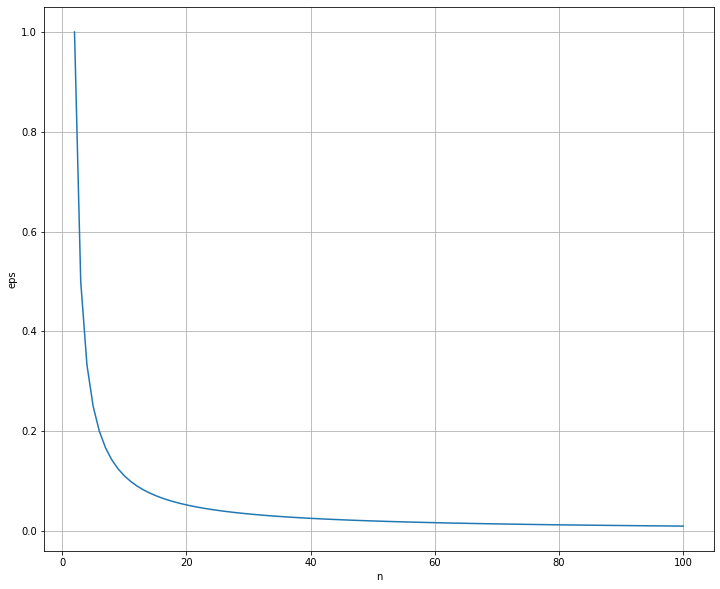

In [64]:
plt.figure(figsize=(12,10))
sns.lineplot('n', 'eps', data=data)
plt.grid()

In [65]:
result = []
step = 0.0001
for n, eps in zip(data['n'], data['eps']):
  A_m, A_r = make_matr(n, eps)

  while(beck_criteria(A_m, A_r)):
    eps+=step
    A_m, A_r = make_matr(n, eps)
  
  result.append(eps-step)

data['true_eps'] = result

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


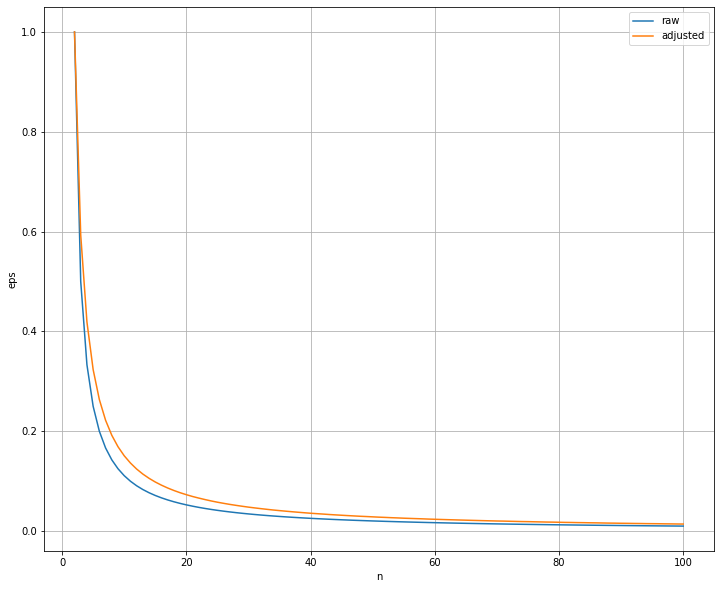

In [68]:
plt.figure(figsize=(12,10))
sns.lineplot('n', 'eps', data=data, label='raw')
sns.lineplot('n', 'true_eps', data=data, label='adjusted')
plt.grid()